In [101]:
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

#Read file
#script_location = Path(__file__).absolute().parent
#file_location = script_location / 'brestcancer.csv'
df_breastCancer = pd.read_csv('brestcancer.csv',delimiter=";",encoding = "ISO-8859-1")

df_breastCancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [102]:
# Removing duplicate rows if any

print('Shape before deleting duplicate values:', df_breastCancer.shape)

df_breastCancer = df_breastCancer.drop_duplicates()

print('Shape after deleting duplicate values:', df_breastCancer.shape)

Shape before deleting duplicate values: (569, 32)
Shape after deleting duplicate values: (569, 32)


We deleted the columns with the standard deviation and the max value as they do not bring value to the dataset, we tried to add using the standard deviation with the mean to create a range but sometimes the standard deviation value was 2x or 3x greater than the range that we define.

In [103]:
df_breastCancer = df_breastCancer.drop(columns=['id', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst'])

#'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst'

In [104]:
goal = df_breastCancer.diagnosis
counts = goal.value_counts()
percent100 = goal.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
pd.DataFrame({'diagnosis': counts,'percent': percent100})

,diagnosis,percent
B,357,62.7%
M,212,37.3%


Percentage of benign and malignant diagnoses

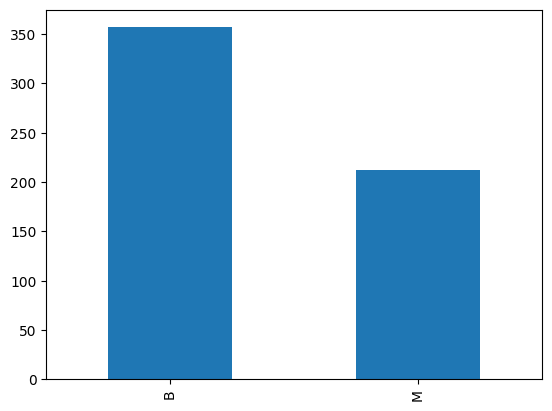

In [105]:
#bar graph target variable: Cumpriu

df_breastCancer['diagnosis'].value_counts().sort_index().plot.bar()
plt.show()

In [106]:
df_breastCancer.isna().sum()

diagnosis                 0
radius_mean               0
texture_mean              0
perimeter_mean            0
area_mean                 0
smoothness_mean           0
compactness_mean          0
concavity_mean            0
concave points_mean       0
symmetry_mean             0
fractal_dimension_mean    0
dtype: int64

In [107]:
df_breastCancer.nunique()

diagnosis                   2
radius_mean               456
texture_mean              479
perimeter_mean            522
area_mean                 539
smoothness_mean           474
compactness_mean          537
concavity_mean            537
concave points_mean       542
symmetry_mean             432
fractal_dimension_mean    499
dtype: int64

In [108]:
df_breastCancer.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440


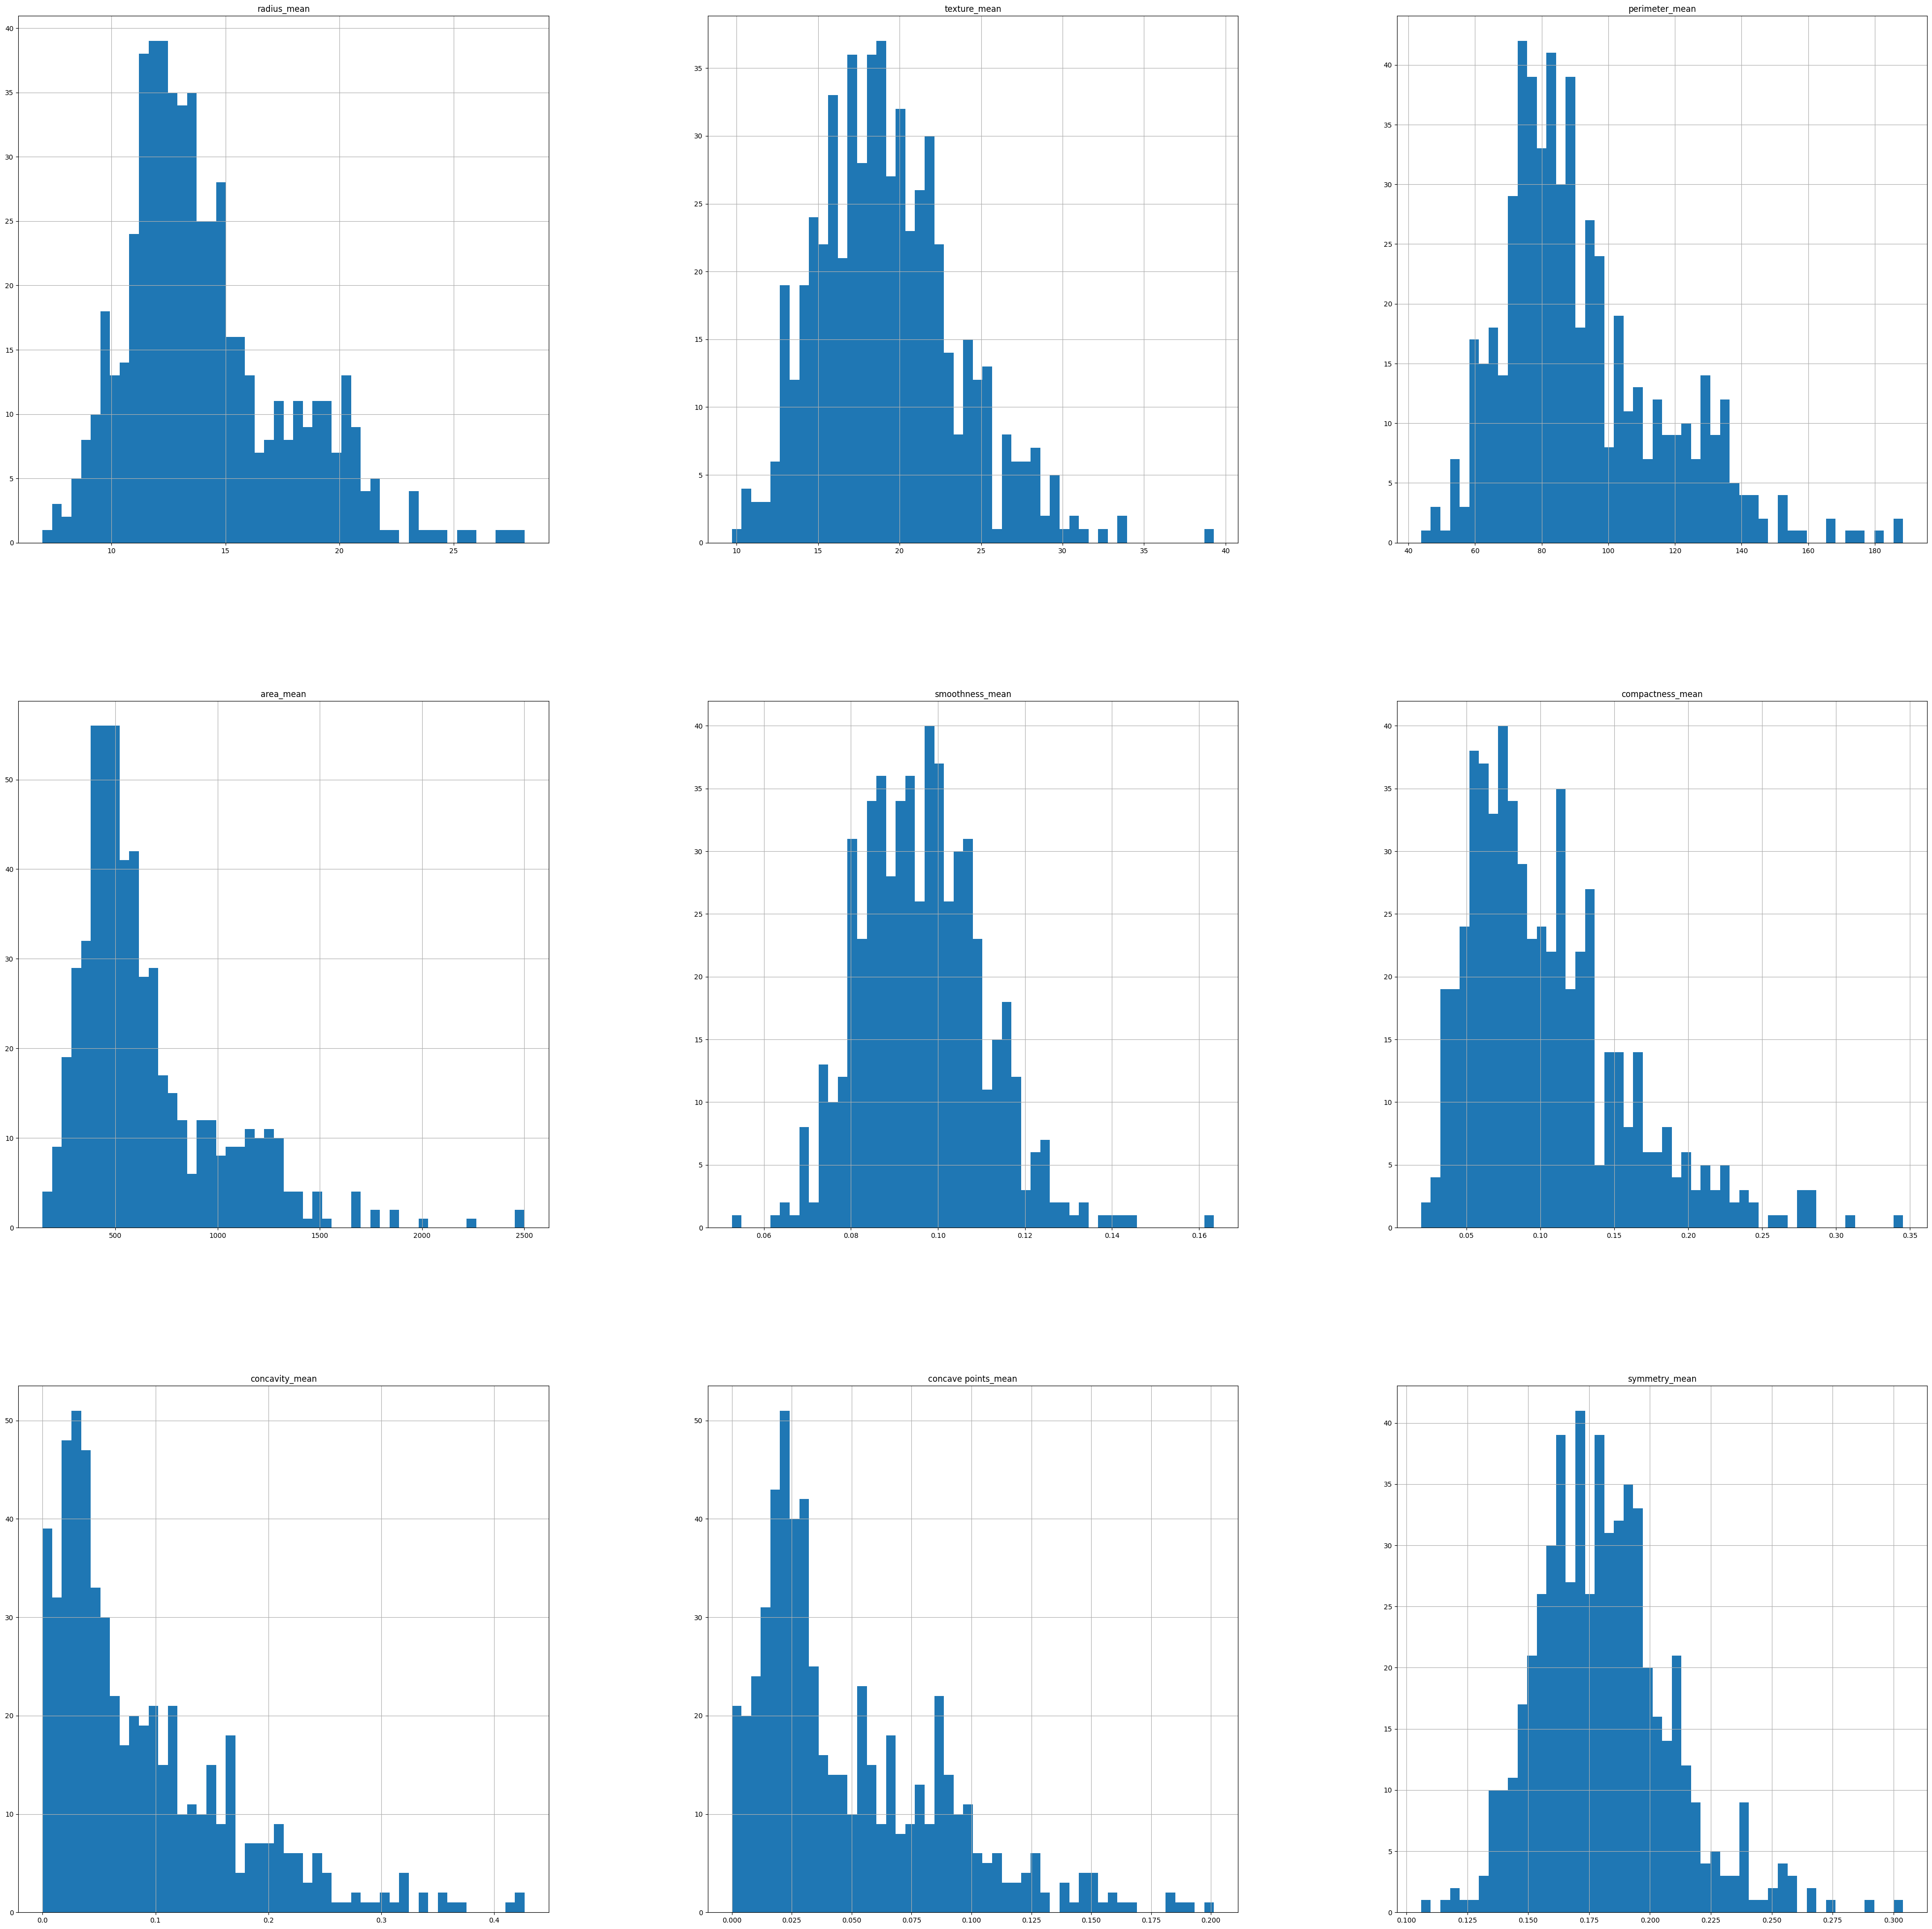

In [109]:
data_num = df_breastCancer.drop(columns=["diagnosis"])

fig, axes = plt.subplots(len(data_num.columns)//3, 3, figsize=(50, 50))
i = 0
for triaxis in axes:
    for axis in triaxis:
        data_num.hist(column = data_num.columns[i], ax=axis, bins=50)
        i = i+1

In [110]:
import math
df = df_breastCancer.drop(columns=["diagnosis"])
min = df.min().values
max = df.max().values
i=0
for column in df.columns:
    column_name = column + "_Interval_Level"
    
    df_breastCancer[column_name] = ((df_breastCancer[column] - min[i])/((max[i]-min[i])))
    i+=1


In [111]:
df_breastCancer.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_mean_Interval_Level,texture_mean_Interval_Level,perimeter_mean_Interval_Level,area_mean_Interval_Level,smoothness_mean_Interval_Level,compactness_mean_Interval_Level,concavity_mean_Interval_Level,concave points_mean_Interval_Level,symmetry_mean_Interval_Level,fractal_dimension_mean_Interval_Level
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.338222,0.323965,0.332935,0.216920,0.394785,0.260601,0.208058,0.243137,0.379605,0.270379
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.166787,0.145453,0.167915,0.149274,0.126967,0.161992,0.186785,0.192857,0.138456,0.148702
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.223342,0.218465,0.216847,0.117413,0.304595,0.139685,0.069260,0.100944,0.282323,0.163016
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.302381,0.308759,0.293345,0.172895,0.390358,0.224679,0.144189,0.166501,0.369697,0.243892
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.416442,0.408860,0.416765,0.271135,0.475490,0.340531,0.306232,0.367793,0.453030,0.340354
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [112]:
df_breastCancer.nunique()

diagnosis                                  2
radius_mean                              456
texture_mean                             479
perimeter_mean                           522
area_mean                                539
smoothness_mean                          474
compactness_mean                         537
concavity_mean                           537
concave points_mean                      542
symmetry_mean                            432
fractal_dimension_mean                   499
radius_mean_Interval_Level               456
texture_mean_Interval_Level              479
perimeter_mean_Interval_Level            522
area_mean_Interval_Level                 539
smoothness_mean_Interval_Level           474
compactness_mean_Interval_Level          537
concavity_mean_Interval_Level            537
concave points_mean_Interval_Level       542
symmetry_mean_Interval_Level             432
fractal_dimension_mean_Interval_Level    499
dtype: int64

In [113]:
SelectedColumns=['radius_mean_Interval_Level', 'texture_mean_Interval_Level', 'perimeter_mean_Interval_Level', 
'area_mean_Interval_Level', 'smoothness_mean_Interval_Level', 'compactness_mean_Interval_Level', 
'concavity_mean_Interval_Level', 'concave points_mean_Interval_Level', 'symmetry_mean_Interval_Level', 
'fractal_dimension_mean_Interval_Level']

dfML=df_breastCancer[SelectedColumns]
dfML.head()

,radius_mean_Interval_Level,texture_mean_Interval_Level,perimeter_mean_Interval_Level,area_mean_Interval_Level,smoothness_mean_Interval_Level,compactness_mean_Interval_Level,concavity_mean_Interval_Level,concave points_mean_Interval_Level,symmetry_mean_Interval_Level,fractal_dimension_mean_Interval_Level
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816


In [114]:
dfML.columns=['radius', 'texture', 'perimeter', 'area', 'smoothness', 'compactness','concavity', 'concave points', 'symmetry', 
'fractal_dimension']

In [115]:
dfML['diagnosis'] = df_breastCancer['diagnosis']

In [116]:
dfML

,radius,texture,perimeter,area,smoothness,compactness,concavity,concave points,symmetry,fractal_dimension,diagnosis
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,M
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,M
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,M
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,M
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,M
...,...,...,...,...,...,...,...,...,...,...,...
564,0.690000,0.428813,0.678668,0.566490,0.526948,0.296055,0.571462,0.690358,0.336364,0.132056,M
565,0.622320,0.626987,0.604036,0.474019,0.407782,0.257714,0.337395,0.486630,0.349495,0.113100,M
566,0.455251,0.621238,0.445788,0.303118,0.288165,0.254340,0.216753,0.263519,0.267677,0.137321,M
567,0.644564,0.663510,0.665538,0.475716,0.588336,0.790197,0.823336,0.755467,0.675253,0.425442,M


In [117]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

list_of_results= []

def classifmodel_Metrics(modelName, model,actual, predicted):
    classes = list(np.unique(np.concatenate((actual,predicted))))
    
    confMtx = confusion_matrix(actual,predicted)
    
    print("Confusion Matrix")
    print(confMtx)
    
    #get classification
    report = classification_report(actual,predicted,output_dict=True)
       
    precision = report['macro avg']['precision']
    recall = report['macro avg']['recall']
    f1= report['macro avg']['f1-score']
    
    res = pd.Series({
        'ModelName':modelName,
        'Model': model,
        'accuracy': round(accuracy_score(predicted,actual),3),
        'precision':round(precision,3),
        'recall':round(recall,3),
        'F1':round(f1,3)
    })

    if len(classes) ==2:
        print("\naccuracy: {0:.2%}".format(round(accuracy_score(predicted,actual),3)))
        print("precision:  {0:.2%}".format(precision),", recall: {0:.2%}".format(recall),"F1:{0:.2%}".format(f1))
    elif len(classes) > 2:
        print("\n",classification_report(actual,predicted))
        
    
    return(res)

In [118]:
from sklearn.model_selection import train_test_split

X = dfML.iloc[:,:-1]
y = dfML.iloc[:,-1]

X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=145,stratify=y)
print('Train B/M distribution\n', y_train.value_counts(normalize=True))
print('\n')
print('Test B/M distribution\n', y_test.value_counts(normalize=True))

Train B/M distribution
 B    0.628141
M    0.371859
Name: diagnosis, dtype: float64


Test B/M distribution
 B    0.625731
M    0.374269
Name: diagnosis, dtype: float64


In [119]:
import warnings
warnings.filterwarnings('ignore')

In [120]:
#from sklearn.preprocessing import StandardScaler
#
#
#stdScaler= StandardScaler()
#X_train = stdScaler.fit_transform(X_train)
#X_test = stdScaler.fit_transform(X_test)

In [121]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
lrm= clf.fit(X_train,y_train)

y_pred = lrm.predict(X_test)

results = classifmodel_Metrics('lrm', lrm,y_test,y_pred)

list_of_results.append(results)

Confusion Matrix
[[106   1]
 [ 13  51]]

accuracy: 91.80%
precision:  93.58% , recall: 89.38% F1:90.87%


Confusion Matrix
[[103   4]
 [  7  57]]

accuracy: 93.60%
precision:  93.54% , recall: 92.66% F1:93.07%


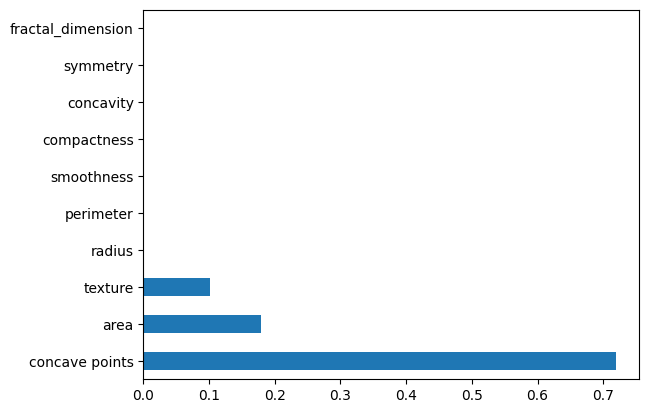

In [122]:
from sklearn import tree


clf = tree.DecisionTreeClassifier(max_depth=3,criterion='entropy')

dtm = clf.fit(X_train,y_train)
y_pred = dtm.predict(X_test)


feature_importance=pd.Series(dtm.feature_importances_,index=X.columns)
feature_importance.nlargest(10).plot(kind='barh')


results= classifmodel_Metrics('dtm',dtm,y_test,y_pred)

list_of_results.append(results)

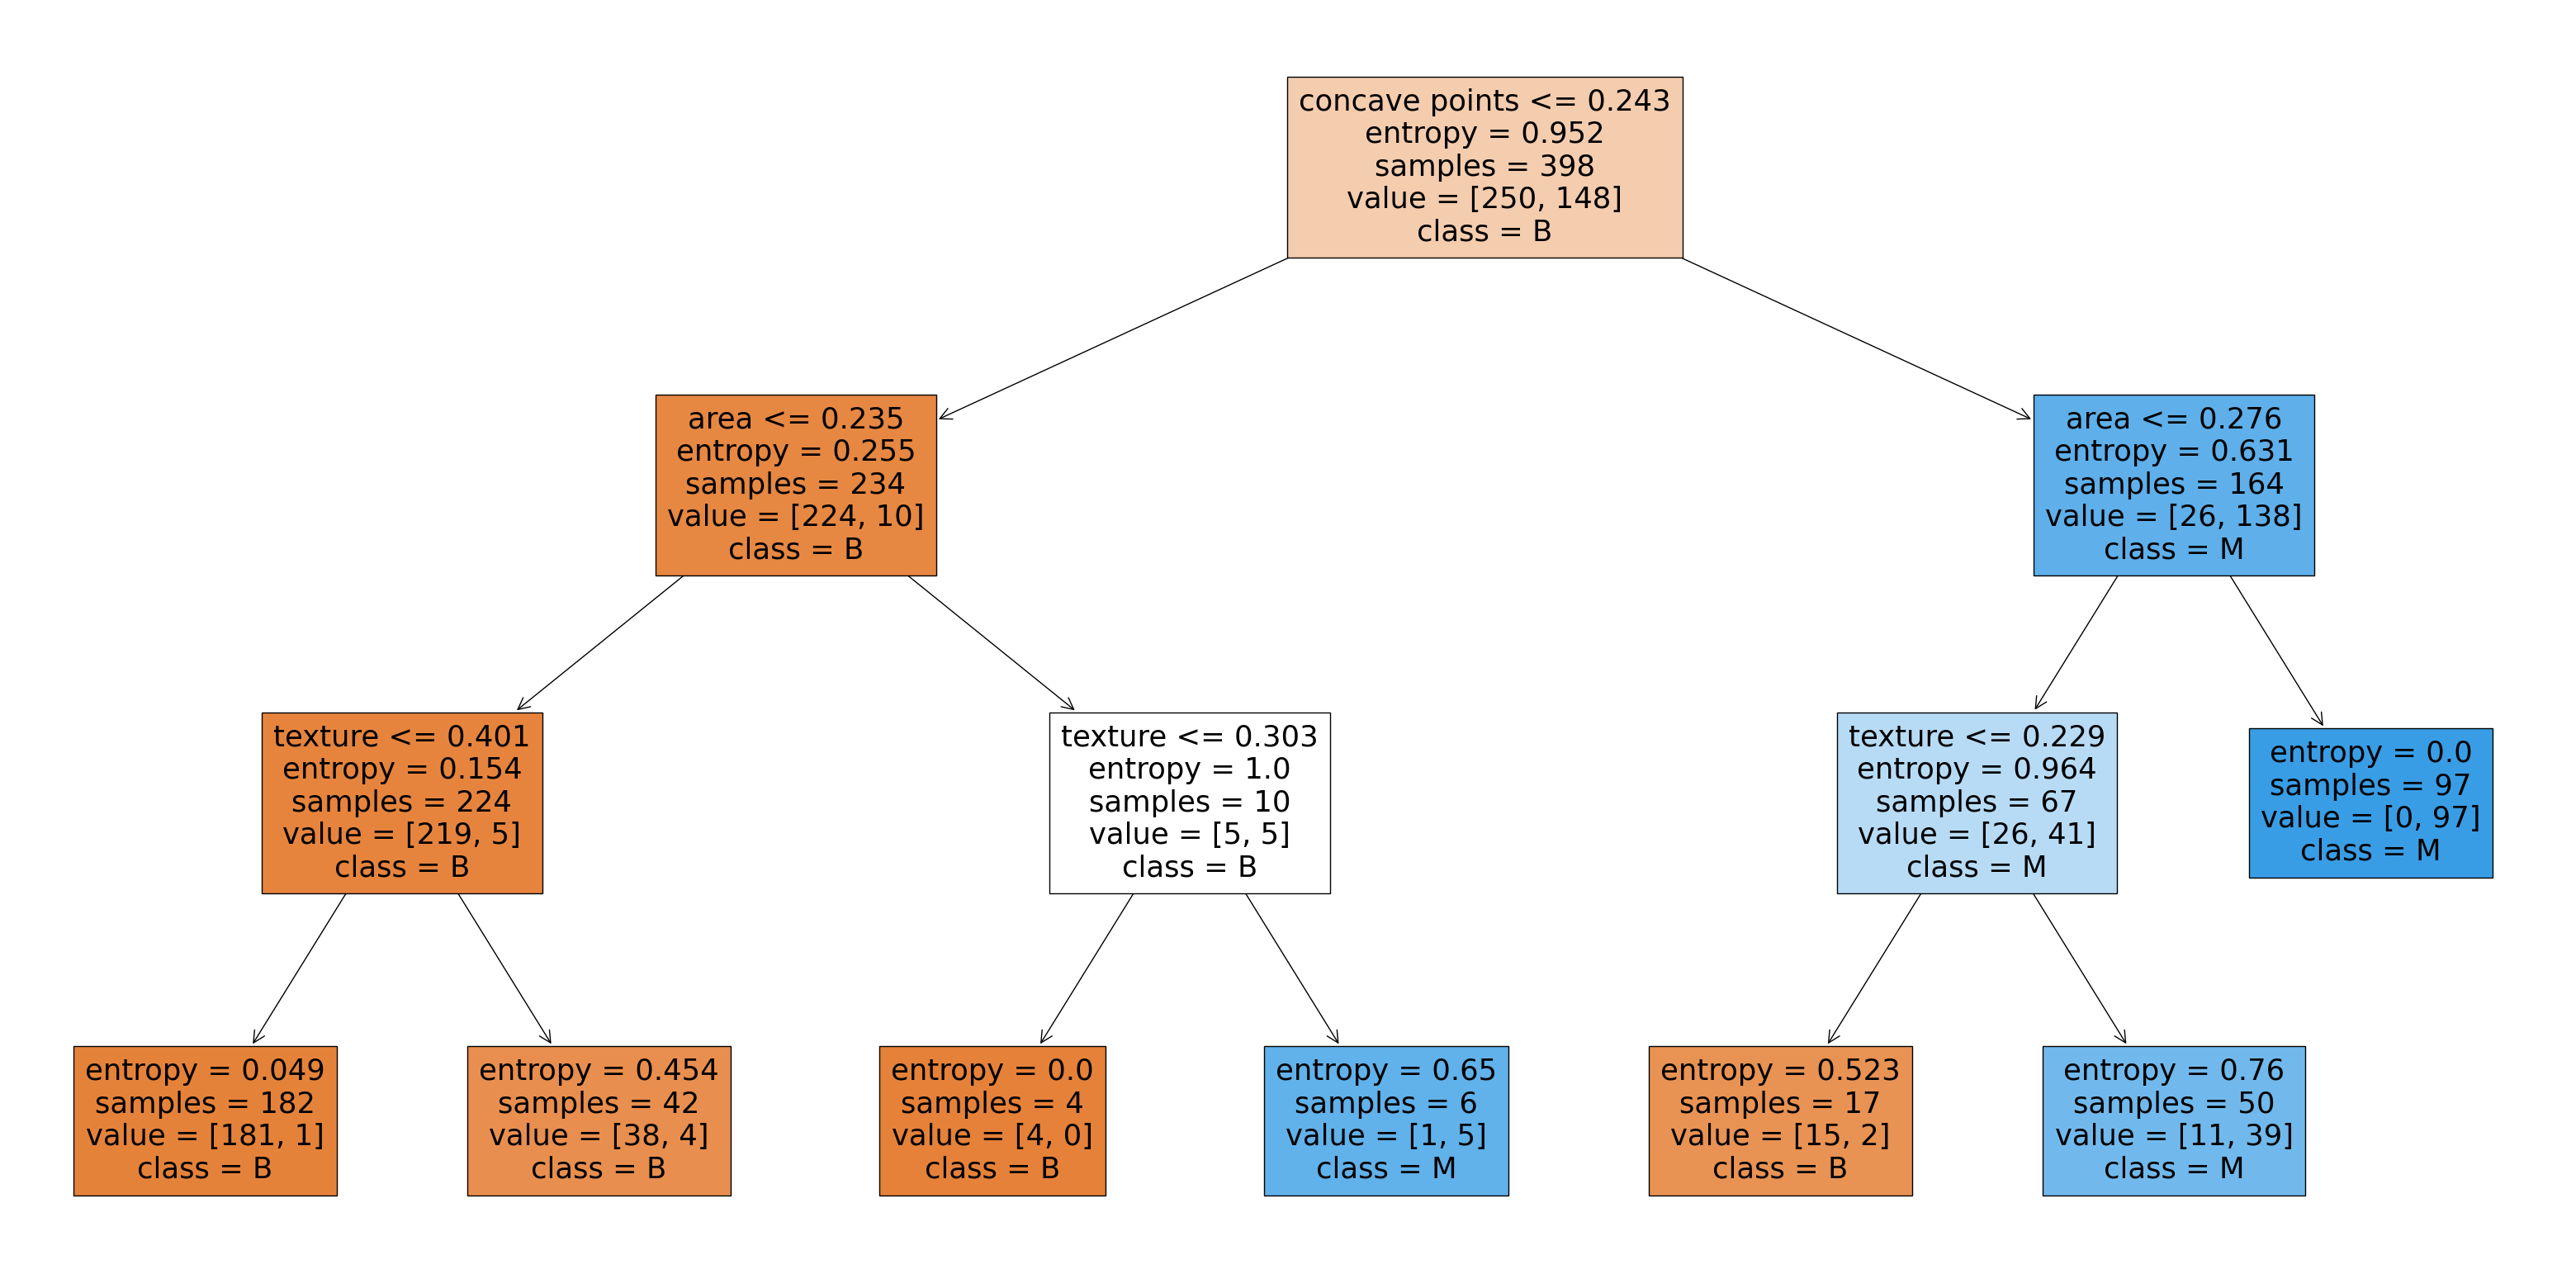

In [132]:
from sklearn import tree

plt.figure(figsize=(40,20))
tree.plot_tree(dtm,feature_names = X.columns, class_names=['B','M'],filled=True)
plt.show()

In [124]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB


nbm = GaussianNB()

nbfit= nbm.fit(X_train, y_train)
y_pred= nbfit.predict(X_test)

results = classifmodel_Metrics('nbm',nbm, y_test,y_pred)
list_of_results.append(results)

Confusion Matrix
[[103   4]
 [  9  55]]

accuracy: 92.40%
precision:  92.59% , recall: 91.10% F1:91.75%


In [125]:
from sklearn.neighbors import KNeighborsClassifier
#default n_neighbors=5


knclf= KNeighborsClassifier(n_neighbors=15)
knn= knclf.fit(X_train,y_train)
y_pred= knclf.predict(X_test)


results = classifmodel_Metrics('knn',knn, y_test,y_pred)
list_of_results.append(results)

Confusion Matrix
[[104   3]
 [  8  56]]

accuracy: 93.60%
precision:  93.89% , recall: 92.35% F1:93.02%


In [126]:
from sklearn import svm

svm = svm.SVC(kernel= 'rbf')

svmfit= svm.fit(X_train,y_train)
y_pred = svmfit.predict(X_test)

results = classifmodel_Metrics('svm',svm, y_test,y_pred)
list_of_results.append(results)

Confusion Matrix
[[107   0]
 [  9  55]]

accuracy: 94.70%
precision:  96.12% , recall: 92.97% F1:94.20%


In [127]:
resdf = pd.DataFrame(list_of_results)
resdf.iloc[:,[0,2,3,4,5]]

,ModelName,accuracy,precision,recall,F1
0,lrm,0.918,0.936,0.894,0.909
1,dtm,0.936,0.935,0.927,0.931
2,nbm,0.924,0.926,0.911,0.917
3,knn,0.936,0.939,0.923,0.930
4,svm,0.947,0.961,0.930,0.942


In [128]:
from sklearn.model_selection import cross_val_score

resdf.sort_values(by=['F1','recall','precision'],ascending=[False,False,False],inplace=True)
print(resdf.iloc[:,[0,2,3,4,5]])

results=[]
names= []

print("\n10-fold cross Validation accuracy values")
for name,model in zip(resdf.iloc[0:3,0],resdf.iloc[0:3,1]):
    res=cross_val_score(model,X,y,cv=10,scoring='f1_weighted')
    
    print('\n',res)
    print(name, 'F1 avg/std', round(res.mean(),3),'/',round(res.std(),3))
    results.append(res)
    names.append(name)

  ModelName  accuracy  precision  recall     F1
4       svm     0.947      0.961   0.930  0.942
1       dtm     0.936      0.935   0.927  0.931
3       knn     0.936      0.939   0.923  0.930
2       nbm     0.924      0.926   0.911  0.917
0       lrm     0.918      0.936   0.894  0.909

10-fold cross Validation accuracy values

 [0.96456419 0.85410896 0.92901849 0.94639676 0.94639676 0.94708706
 0.94639676 1.         0.93041695 0.92857143]
svm F1 avg/std 0.939 / 0.035

 [0.90958165 0.82579531 0.91066127 0.8501548  0.91181177 0.91268295
 0.91066127 0.94639676 0.96450925 0.94546891]
dtm F1 avg/std 0.909 / 0.04

 [0.96491228 0.85825675 0.96491228 0.92797784 0.92901849 0.91268295
 0.92982456 1.         0.93041695 0.92857143]
knn F1 avg/std 0.935 / 0.035


In [129]:
import pickle
pickle.dump(lrm, open('models/lrm_model.pkl','wb'))
pickle.dump(dtm, open('models/dtm_model.pkl','wb'))
pickle.dump(nbm, open('models/nbm_model.pkl','wb'))
pickle.dump(knn, open('models/knn_model.pkl','wb'))
pickle.dump(svm, open('models/svm_model.pkl','wb'))

In [130]:
def normalize_Values(listvalues):
    i=0
    for column in df.columns:
        listvalues[i] = (listvalues[i] - min[i])/((max[i]-min[i]))
        i+=1
    return listvalues

In [131]:
lrm_model = pickle.load(open('models/lrm_model.pkl','rb'))
dtm_model = pickle.load(open('models/dtm_model.pkl','rb'))
nbm_model = pickle.load(open('models/nbm_model.pkl','rb'))
knn_model = pickle.load(open('models/knn_model.pkl','rb'))
svm_model = pickle.load(open('models/svm_model.pkl','rb'))

listvalues = normalize_Values([14.26, 18.17, 91.22, 633.1, 0.06576, 0.0522, 0.02475, 0.01374, 0.1635, 0.05586

])
print(listvalues)
print("lrm: ",lrm_model.predict([listvalues]))
print("dtm: ",dtm_model.predict([listvalues]))
print("nbm: ",nbm_model.predict([listvalues]))
print("knn: ",knn_model.predict([listvalues]))
print("svm: ",svm_model.predict([listvalues]))

[0.3445028160348337, 0.2861007778153534, 0.3277589662082786, 0.207677624602333, 0.11853389907014533, 0.10066867063370347, 0.05798969072164949, 0.06829025844930418, 0.29040404040404044, 0.12426284751474309]
lrm:  ['B']
dtm:  ['B']
nbm:  ['B']
knn:  ['B']
svm:  ['B']
